# PyTorch Image Classification Demo

This code demonstrates how we can use a pre-trained neural network for image classification.

It is adapted from chapter 2 of Deep Learning with PyTorch by Thomas Viehmann, Eli Stevens, Luca Pietro Giovanni Antiga, Manning Publications. The original code is available here:
https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch2/2_pre_trained_networks.ipynb

The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision. See: https://pytorch.org/vision/stable/index.html

In [1]:
import torch
from torchvision import models

Here we see which models are available.

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

For example, the well-known AlexNet model is available.

In [3]:
model = models.AlexNet()

In this demo we will use a pretrained version of the ResNet model described in the paper Deep Residual Learning for Image Recognition by Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun from 2015. The paper is available here: https://arxiv.org/abs/1512.03385

In [4]:
model = models.resnet101(weights='DEFAULT')

Here we see the structure of the model we've just loaded.

In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Before we can classify any images, we need to preprocess them so that they are the right size and shape and so that their colours are normalised in the same way as the data that the network was trained on. 

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

The original code loaded bobby.jpg, an image of a dog. The image is available in the GitHub: https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/bobby.jpg

I thought I would load an image of my brother's dog, Finn.

In [7]:
from PIL import Image
img = Image.open("Finn.jpg")

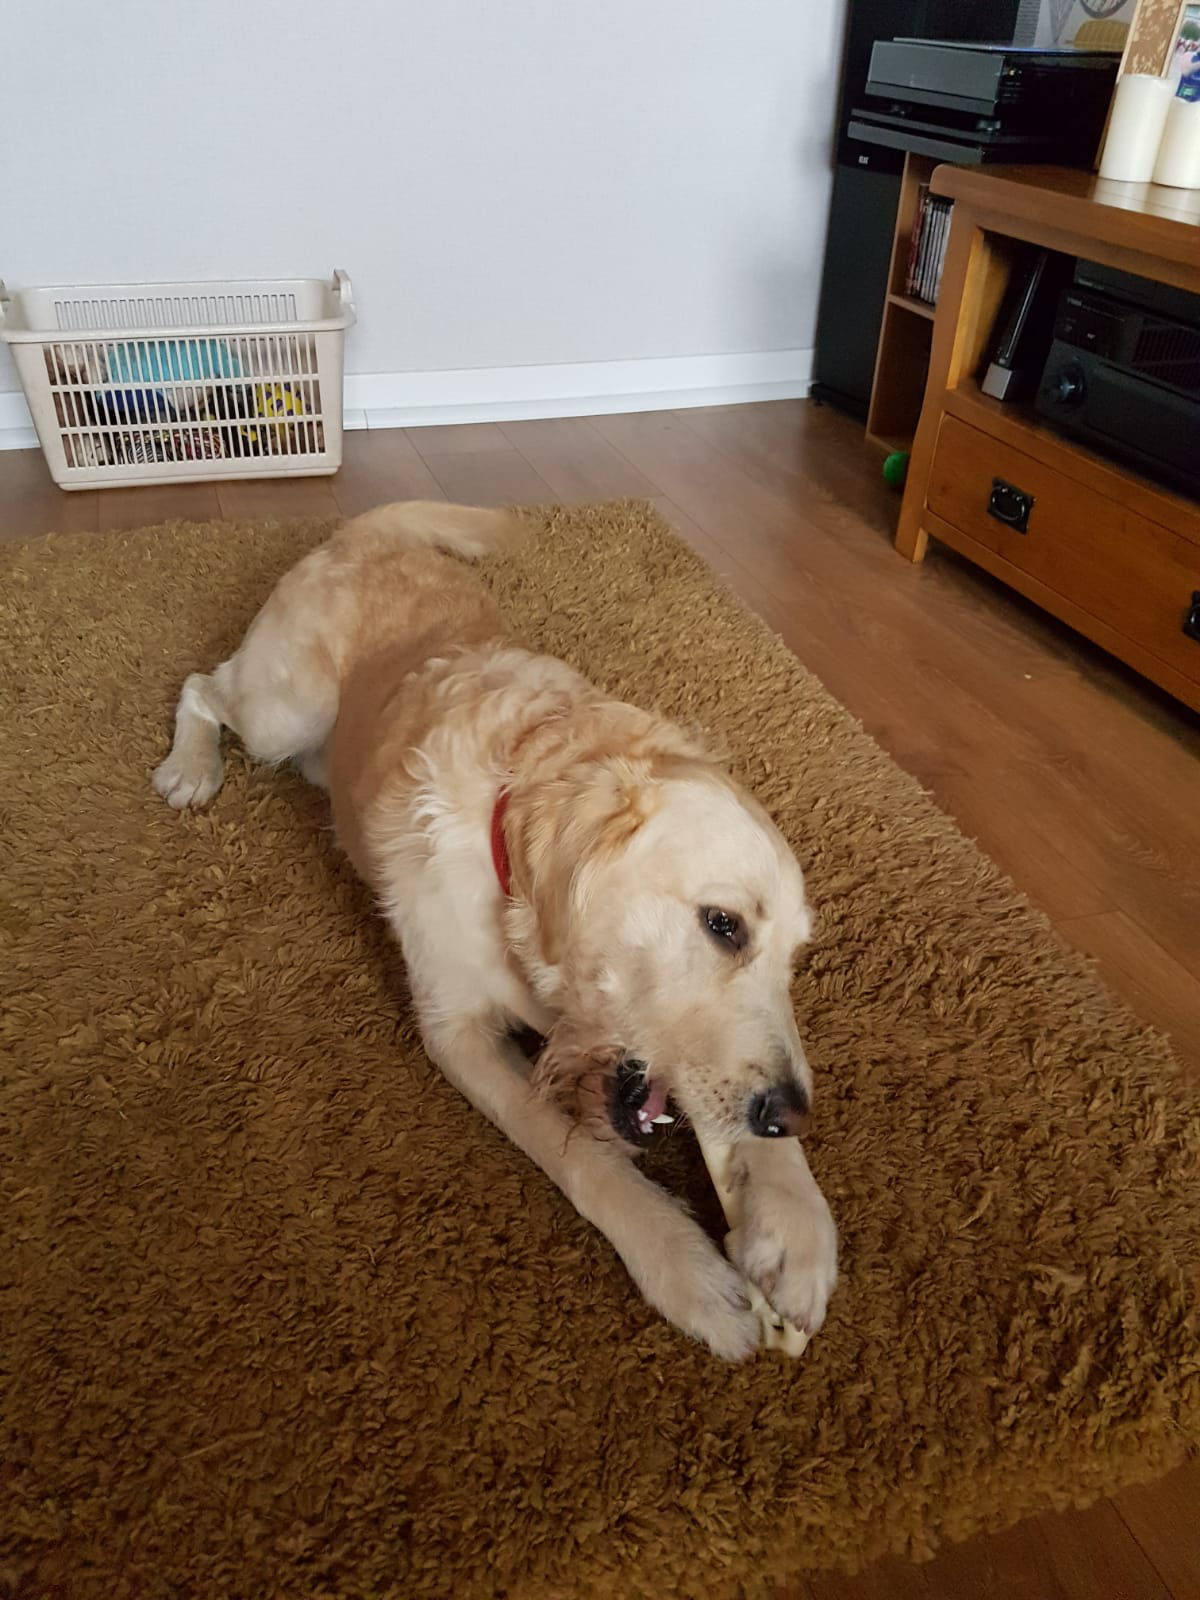

In [8]:
img

Now we'll preprocess the image to reshape, crop, and normalize the input tensor as required by the model.

In [9]:
img_t = preprocess(img)

Let's see what the processed image looks like.

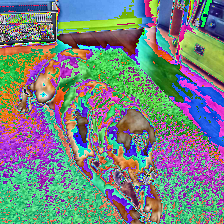

In [10]:
from torchvision import transforms
trans = transforms.ToPILImage()
transformed_image = trans(img_t)
transformed_image

Here we put the network into eval mode. This enables us to use it for inference, that is to classify images.

In [11]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

We now pass our processed tensor batch_t through the network. This returns a number for every one of the 1000 ImageNet classes. The higher the number, the more the more strongly the model predicts that the image belongs to the class.

In [12]:
batch_t = torch.unsqueeze(img_t, 0)
model_output = model(batch_t)
model_output

tensor([[-3.2491e-01, -2.8603e-02,  2.5575e-01,  1.6450e-01,  5.0755e-01,
         -7.5078e-01, -5.5211e-01, -4.4101e-01,  1.4024e-01, -1.8023e-01,
          2.4566e-01,  2.4736e-01, -2.1614e-01, -7.8970e-02, -2.9907e-01,
          3.5747e-02,  2.4106e-02, -3.8255e-01, -6.4051e-01, -6.6663e-01,
         -2.5299e-01,  3.4940e-01,  2.4168e-01, -1.6469e-01,  9.6016e-02,
         -1.4942e-01, -1.2139e-01, -1.1009e-01, -1.9489e-01,  1.1940e-01,
          2.6487e-01,  1.5966e-01, -2.9025e-01, -1.0236e+00, -3.7372e-01,
          1.0411e-01, -8.1814e-01, -3.1910e-01, -5.8767e-02, -3.1898e-01,
          1.3507e-01, -2.3999e-01,  4.8394e-01,  4.9293e-01, -2.7870e-01,
          1.9963e-01, -3.3209e-01, -2.7747e-01,  8.1464e-02,  4.1768e-02,
         -1.2529e-01,  6.2285e-01, -2.8130e-01, -4.5775e-01,  4.4889e-02,
         -2.3513e-01,  8.3588e-02, -4.7461e-01, -4.4846e-02,  7.9072e-02,
         -1.1812e+00,  1.2288e-01, -1.1590e-01,  1.8888e-01, -4.3820e-02,
         -2.7919e-02, -6.8840e-01, -3.

To find out the label of the class with the highest score, we first need to load the labels. This file is available on GitHub at https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch2/imagenet_classes.txt

In [13]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

The torch.max function will give us the highest value (which we ignore below), and the indexes that had that value. These are tensors. We can extract a basic Python numeric type using the item method.

In [14]:
_, label_index = torch.max(model_output, 1)
label_index = label_index[0].item()  # index[0] as it's possible that more than one label has the highest value.
label_index

207

We can now show the label that got the highest value when the neural network was given the processed image as input.

In [15]:
labels[label_index]

'golden retriever'

Here we use softmax to calculate a value that we can interpret as a percentage probability that the image belongs to the class with the given label.

In [16]:
percentages = torch.nn.functional.softmax(model_output, dim=1)[0] * 100
percentages[label_index].item()

60.18770217895508

And now we sort the labels and show the percentage probability of the top 5.

In [17]:
_, indices = torch.sort(model_output, descending=True)
[(labels[idx], percentages[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 60.18770217895508),
 ('doormat, welcome mat', 4.777397155761719),
 ('borzoi, Russian wolfhound', 3.0068461894989014),
 ('Labrador retriever', 2.0593273639678955),
 ('Great Pyrenees', 1.8299946784973145)]